In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
## connection
conn = sqlite3.connect('/Users/xingobar/Downloads/database.sqlite')
tag = pd.read_sql_query('Select * From tags', conn)
torrents = pd.read_sql_query('Select * From torrents',conn)

In [3]:
torrents.head()

,groupName,totalSnatched,artist,groupYear,releaseType,groupId,id
0,superappin&#39;,239,grandmaster flash & the furious five,1979,single,720949,0
1,spiderap / a corona jam,156,ron hunt & ronnie g & the sm crew,1979,single,728752,1
2,rapper&#39;s delight,480,sugarhill gang,1979,single,18513,2
3,rap-o clap-o / el rap-o clap-o,200,joe bataan,1979,single,756236,3
4,christmas rappin&#39;,109,kurtis blow,1979,single,71818958,4


# Release Type Distribution

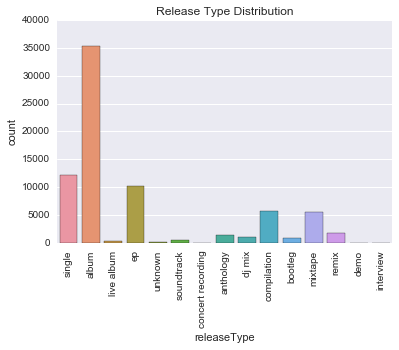

In [4]:
ax = sns.countplot(torrents['releaseType'])
plt.title('Release Type Distribution')
ticks = plt.setp(ax.get_xticklabels(),rotation=90)

# GroupYear vs ReleaseType

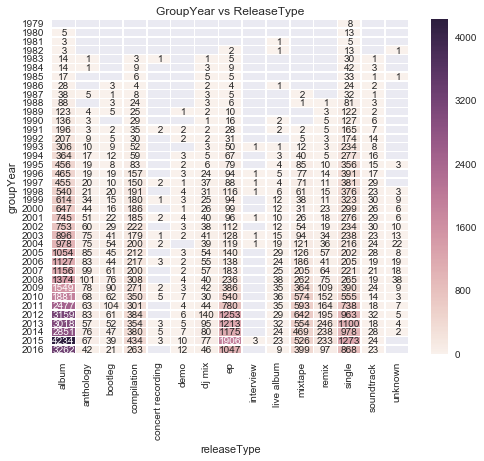

In [5]:
table_count = pd.pivot_table(data=torrents,
                             index=['groupYear'],
                             columns=['releaseType'],
                             values=['totalSnatched'],
                             aggfunc='count')

fig,ax = plt.subplots(figsize=(8,6))
plt.title('GroupYear vs ReleaseType')
sns.heatmap(table_count['totalSnatched'],vmin=0,linewidth=.5,annot=True,fmt='2.0f')

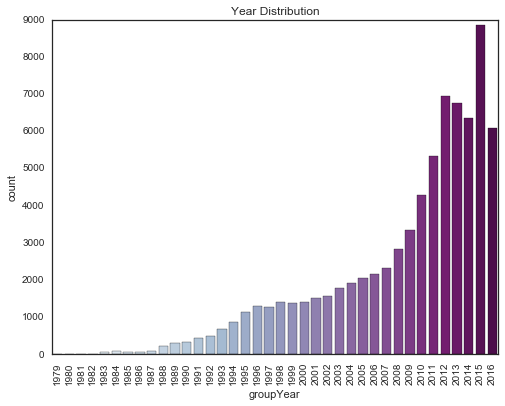

In [6]:
sns.set(style="white")
fig,ax = plt.subplots(figsize=(8,6))
g = sns.countplot(data = torrents,
               x = 'groupYear',
               palette="BuPu",ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Year Distribution')

# Artist vs Release Type

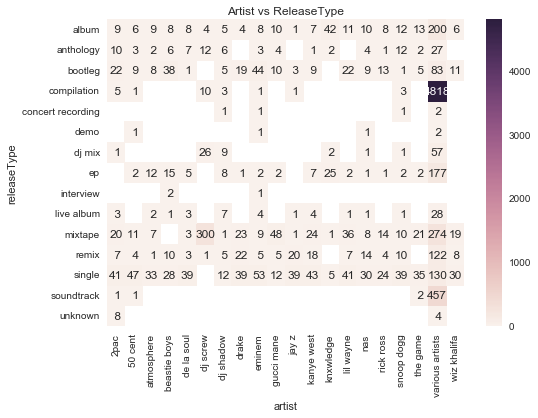

In [7]:
artist_counts = torrents['artist'].value_counts().sort_values(ascending=False)[:20]
artist_name = artist_counts.index

table_count = pd.pivot_table(data = torrents[torrents['artist'].isin(artist_name)],
                             index=['releaseType'],
                             columns=['artist'],
                             values=['totalSnatched'],
                             aggfunc='count')

sns.heatmap(table_count['totalSnatched'],vmin=0,annot=True,fmt='2.0f')
plt.title('Artist vs ReleaseType')

# Artist vs Year

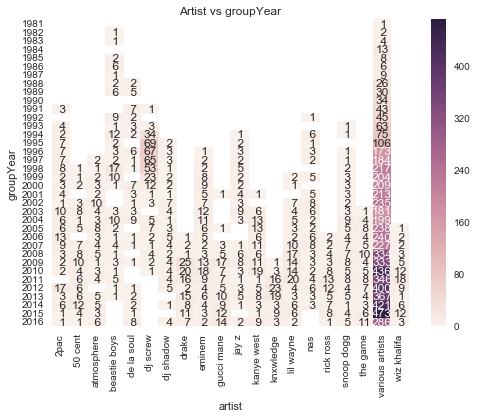

In [8]:
artist_counts = torrents['artist'].value_counts().sort_values(ascending=False)[:20]
artist_name = artist_counts.index

table_count = pd.pivot_table(data = torrents[torrents['artist'].isin(artist_name)],
                             index=['groupYear'],
                             columns=['artist'],
                             values=['totalSnatched'],
                             aggfunc='count')

sns.heatmap(table_count['totalSnatched'],vmin=0,annot=True,fmt='2.0f')
plt.title('Artist vs groupYear')

In [9]:
all_data = pd.merge(torrents,tag,on='id')
all_data.head()

,groupName,totalSnatched,artist,groupYear,releaseType,groupId,id,index,tag
0,superappin&#39;,239,grandmaster flash & the furious five,1979,single,720949,0,0,1970s
1,superappin&#39;,239,grandmaster flash & the furious five,1979,single,720949,0,1,funk
2,superappin&#39;,239,grandmaster flash & the furious five,1979,single,720949,0,2,disco
3,rapper&#39;s delight,480,sugarhill gang,1979,single,18513,2,3,1970s
4,rapper&#39;s delight,480,sugarhill gang,1979,single,18513,2,4,new.york


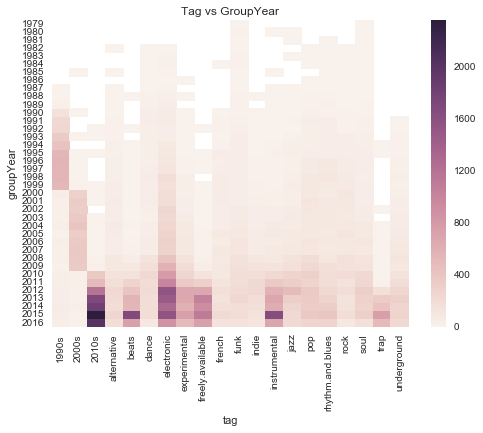

In [10]:
tag_counts = all_data['tag'].value_counts().sort_values(ascending=False)[:20]
tag_index = tag_counts.index

table_count = pd.pivot_table(all_data[all_data['tag'].isin(tag_index)],
                             index=['groupYear'],
                             columns=['tag'],
                             values=['totalSnatched'],
                             aggfunc='count')
sns.heatmap(table_count['totalSnatched'],vmin=0,annot=False)
plt.title('Tag vs GroupYear')

In [11]:
all_data['cut_Year'] = pd.cut(all_data['groupYear'],[1978,1990,2001,2012,2017],
                              labels=['1979-1989','1990-2000','2001-2011','2012+'])

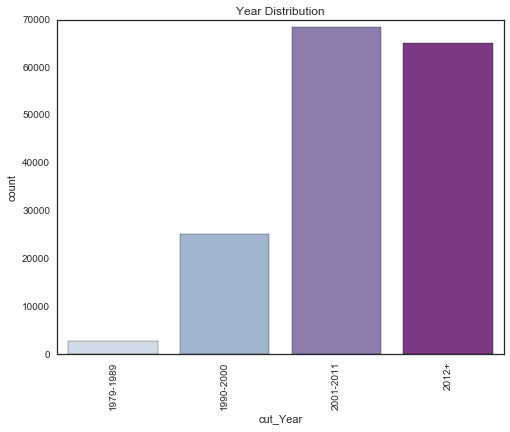

In [12]:
sns.set(style="white")
fig,ax = plt.subplots(figsize=(8,6))
g = sns.countplot(data = all_data,
               x = 'cut_Year',
               palette="BuPu",ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.title('Year Distribution')

# CutYear vs Release Type

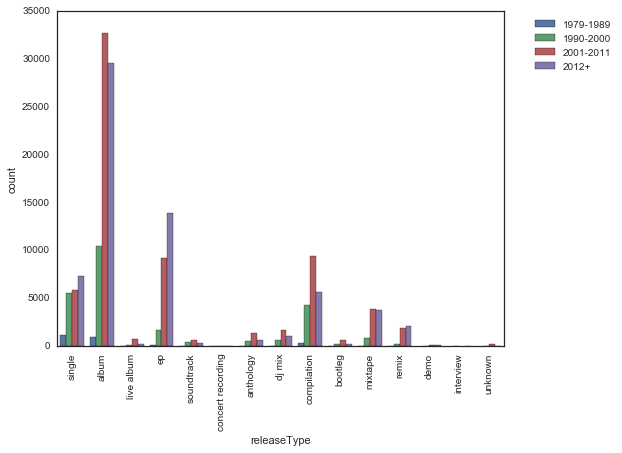

In [13]:
fig,ax=plt.subplots(figsize=(8,6))
ax = sns.countplot(data=all_data, x ='releaseType',hue='cut_Year',ax=ax)
ticks = plt.setp(ax.get_xticklabels(),rotation=90)
plt.legend(loc='best',bbox_to_anchor=(1.05, 1))

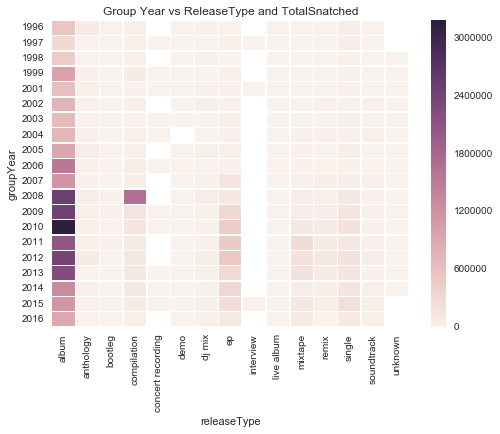

In [14]:
year_index = all_data['groupYear'].value_counts().sort_values(ascending=False)[:20].index

table_count = pd.pivot_table(data=all_data[all_data['groupYear'].isin(year_index)],
                             index=['groupYear'],
                             columns=['releaseType'],
                             values=['totalSnatched'],
                             aggfunc='sum')


sns.heatmap(table_count['totalSnatched'],vmin=0,linewidth=.5,annot=False)
plt.title('Group Year vs ReleaseType and TotalSnatched')